# DonorsChoose EDA

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "~/.kaggle/datasets/donorschoose/io/"
donors = pd.read_csv(path+"Donors.csv", low_memory=False)
donations = pd.read_csv(path + "Donations.csv", low_memory=False)
projects = pd.read_csv(path + "Projects.csv", low_memory=False)
resources = pd.read_csv(path + "Resources.csv", low_memory=False)
schools = pd.read_csv(path + "Schools.csv", low_memory=False)
teachers = pd.read_csv(path + "Teachers.csv", low_memory=False)


/Users/johnchrishays/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [159]:
state_populations = pd.read_excel('./nst_est2017-01.csv', sheet_name = 'NST01')
state_populations = state_populations.fillna("-")
state_populations.columns = state_populations.iloc[2]
state_populations.reindex(state_populations.index.drop(2))
state_populations = state_populations.rename(columns={'-': "Geographic Area"})
state_populations
statelist = donors[donors['Donor State'] != 'other'].sort_values(['Donor State'], axis=0)['Donor State'].unique()

## Donors

In [3]:
donors.head()

,Donor ID,Donor City,Donor State,Donor Is Teacher,Donor Zip
0,00000ce845c00cbf0686c992fc369df4,Evanston,Illinois,No,602
1,00002783bc5d108510f3f9666c8b1edd,Appomattox,other,No,245
2,00002d44003ed46b066607c5455a999a,Winton,California,Yes,953
3,00002eb25d60a09c318efbd0797bffb5,Indianapolis,Indiana,No,462
4,0000300773fe015f870914b42528541b,Paterson,New Jersey,No,075


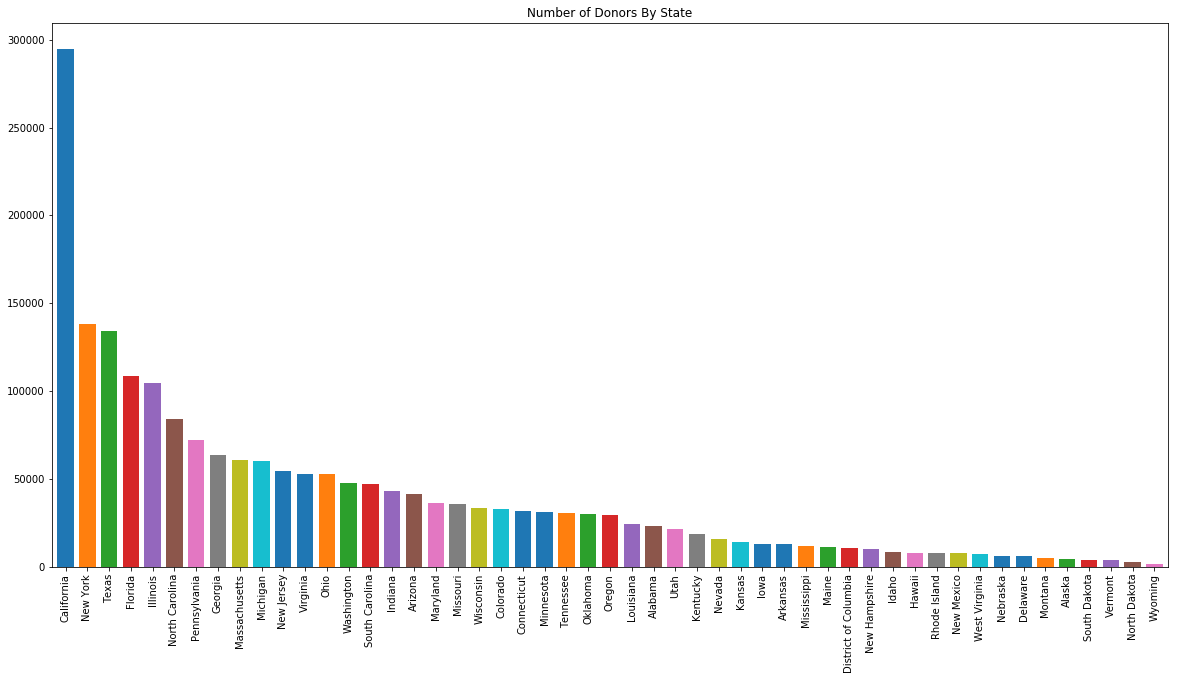

In [4]:
donors[donors['Donor State'] != "other"]['Donor State'].value_counts().plot.bar(
    width=.75,
    figsize=(20, 10),
    title='Number of Donors By State')

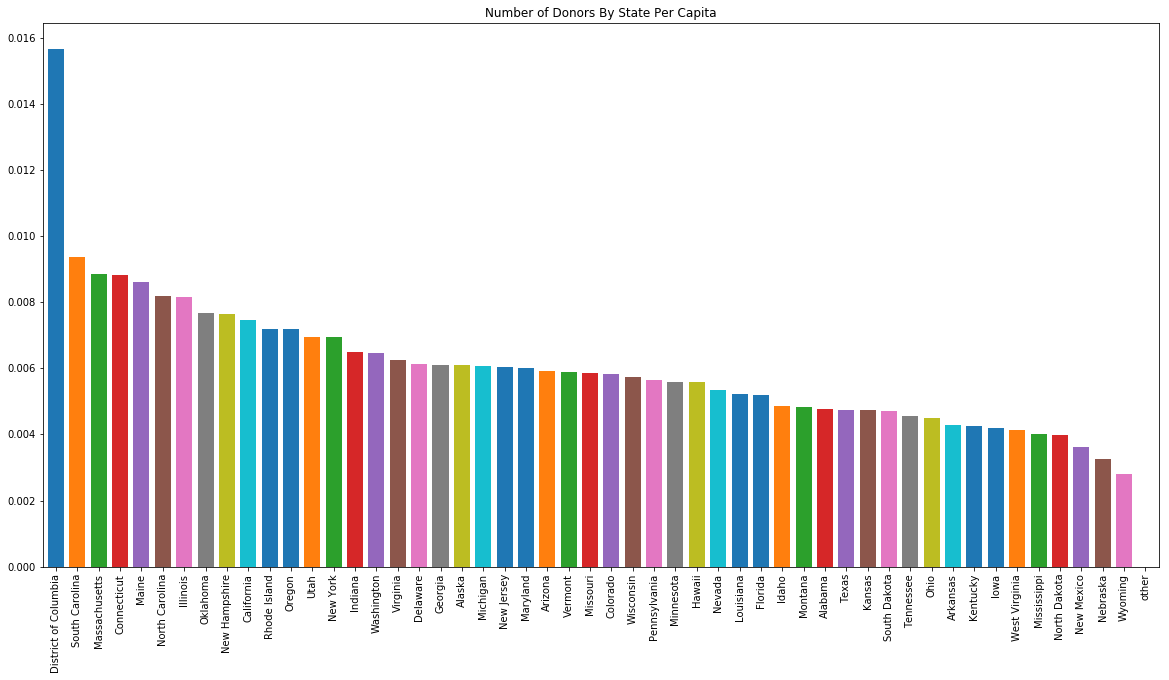

In [171]:
dpc = donors.groupby(['Donor State'])['Donor ID'].count()#.reset_index().drop(['Donor State'], axis=1)
sp = state_populations.loc[8:58, [2017]][2017].reset_index().drop(['index'], axis=1)
sp = sp.set_index(statelist)
donations_per_capita = pd.concat([dpc, sp], axis=1, sort=True)
donations_per_capita['dpc'] = donations_per_capita['Donor ID'] / donations_per_capita[2017]
donations_per_capita['dpc'].sort_values(ascending=False).plot.bar(
    width=.75,
    figsize=(20, 10),
    title='Number of Donors By State Per Capita')

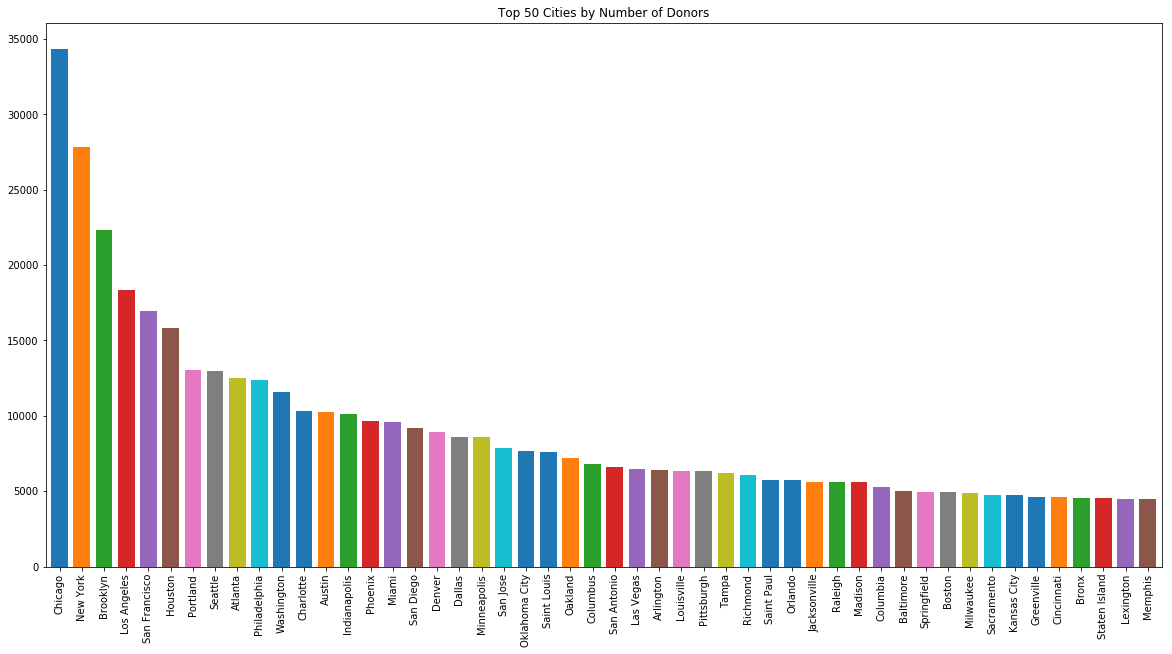

In [5]:
donors['Donor City'].value_counts().head(50).plot.bar(
    width=.75,
    figsize=(20, 10),
    title='Top 50 Cities by Number of Donors')

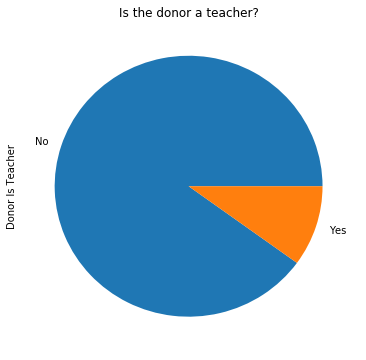

In [6]:
donors['Donor Is Teacher'].value_counts().plot.pie(
    figsize=(6, 6),
    title='Is the donor a teacher?')

## Donations

In [7]:
donations.head()

,Project ID,Donation ID,Donor ID,Donation Included Optional Donation,Donation Amount,Donor Cart Sequence,Donation Received Date
0,000009891526c0ade7180f8423792063,688729120858666221208529ee3fc18e,1f4b5b6e68445c6c4a0509b3aca93f38,No,178.37,11,2016-08-23 13:15:57
1,000009891526c0ade7180f8423792063,dcf1071da3aa3561f91ac689d1f73dee,4aaab6d244bf3599682239ed5591af8a,Yes,25.00,2,2016-06-06 20:05:23
2,000009891526c0ade7180f8423792063,18a234b9d1e538c431761d521ea7799d,0b0765dc9c759adc48a07688ba25e94e,Yes,20.00,3,2016-06-06 14:08:46
3,000009891526c0ade7180f8423792063,38d2744bf9138b0b57ed581c76c0e2da,377944ad61f72d800b25ec1862aec363,Yes,25.00,1,2016-05-15 10:23:04
4,000009891526c0ade7180f8423792063,5a032791e31167a70206bfb86fb60035,6d5b22d39e68c656071a842732c63a0c,Yes,25.00,2,2016-05-17 01:23:38


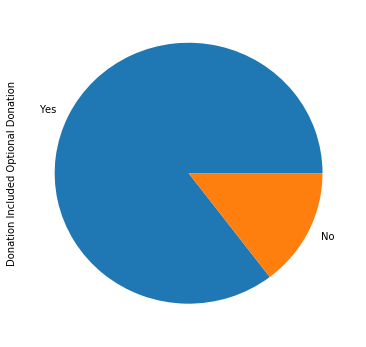

In [8]:
donations['Donation Included Optional Donation'].value_counts().plot.pie(
    figsize=(6,6))

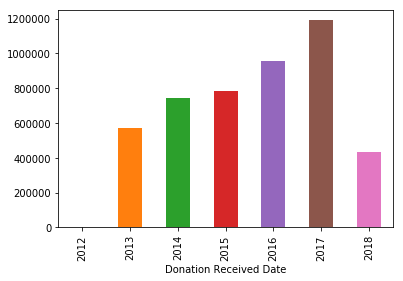

In [9]:
donations['Donation Received Date'] = donations['Donation Received Date'].astype('datetime64')
donations['Project ID'].groupby(donations["Donation Received Date"].dt.year).count().plot.bar()

## Projects

In [10]:
projects.head()

,Project ID,School ID,Teacher ID,Teacher Project Posted Sequence,Project Type,Project Title,Project Essay,Project Short Description,Project Need Statement,Project Subject Category Tree,Project Subject Subcategory Tree,Project Grade Level Category,Project Resource Category,Project Cost,Project Posted Date,Project Expiration Date,Project Current Status,Project Fully Funded Date
0,7685f0265a19d7b52a470ee4bac883ba,e180c7424cb9c68cb49f141b092a988f,4ee5200e89d9e2998ec8baad8a3c5968,25,Teacher-Led,Stand Up to Bullying: Together We Can!,Did you know that 1-7 students in grades K-12 ...,Did you know that 1-7 students in grades K-12 ...,"My students need 25 copies of ""Bullying in Sch...",Applied Learning,"Character Education, Early Development",Grades PreK-2,Technology,361.80,2013-01-01,2013-05-30,Fully Funded,2013-01-11
1,f9f4af7099061fb4bf44642a03e5c331,08b20f1e2125103ed7aa17e8d76c71d4,cca2d1d277fb4adb50147b49cdc3b156,3,Teacher-Led,Learning in Color!,"Help us have a fun, interactive listening cent...","Help us have a fun, interactive listening cent...","My students need a listening center, read alon...","Applied Learning, Literacy & Language","Early Development, Literacy",Grades PreK-2,Technology,512.85,2013-01-01,2013-05-31,Expired,NaN
2,afd99a01739ad5557b51b1ba0174e832,1287f5128b1f36bf8434e5705a7cc04d,6c5bd0d4f20547a001628aefd71de89e,1,Teacher-Led,Help Second Grade ESL Students Develop Languag...,Visiting or moving to a new place can be very ...,Visiting or moving to a new place can be very ...,My students need beginning vocabulary audio ca...,Literacy & Language,ESL,Grades PreK-2,Supplies,435.92,2013-01-01,2013-05-30,Fully Funded,2013-05-22
3,c614a38bb1a5e68e2ae6ad9d94bb2492,900fec9cd7a3188acbc90586a09584ef,8ed6f8181d092a8f4c008b18d18e54ad,40,Teacher-Led,Help Bilingual Students Strengthen Reading Com...,Students at our school are still working hard ...,Students at our school are still working hard ...,My students need one copy of each book in The ...,Literacy & Language,"ESL, Literacy",Grades 3-5,Books,161.26,2013-01-01,2013-05-31,Fully Funded,2013-02-06
4,ec82a697fab916c0db0cdad746338df9,3b200e7fe3e6dde3c169c02e5fb5ae86,893173d62775f8be7c30bf4220ad0c33,2,Teacher-Led,Help Us Make Each Minute Count!,"""Idle hands"" were something that Issac Watts s...","""Idle hands"" were something that Issac Watts s...","My students need items such as Velcro, two pou...",Special Needs,Special Needs,Grades 3-5,Supplies,264.19,2013-01-01,2013-05-30,Fully Funded,2013-01-01


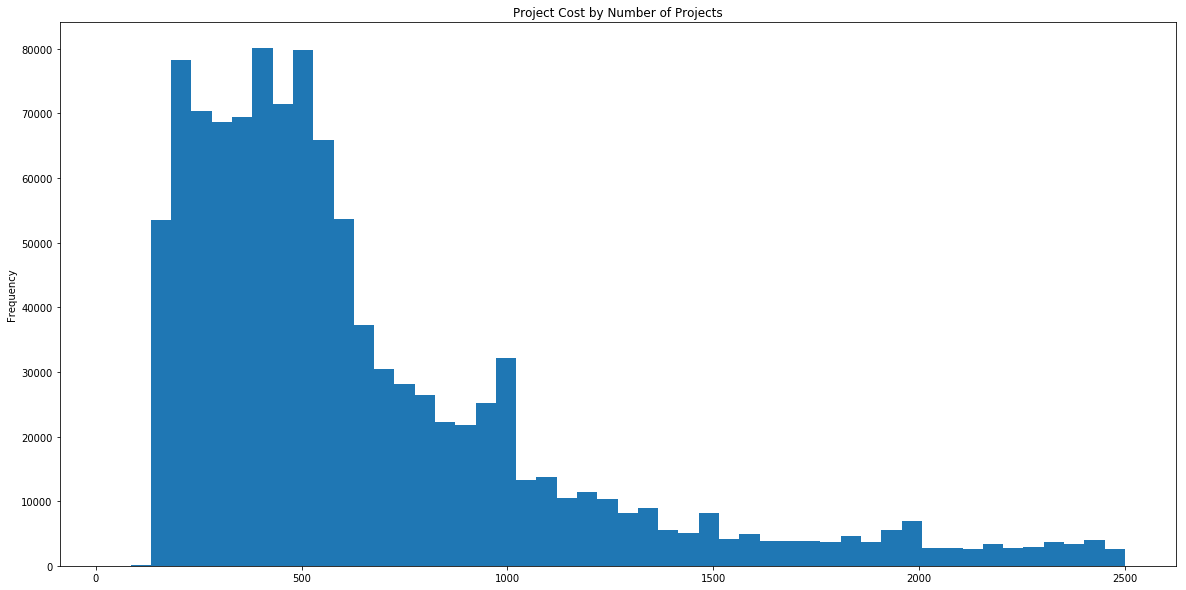

In [11]:
projects[projects['Project Cost'] <= 2500]['Project Cost'].plot.hist(bins=50, figsize=(20,10), title="Project Cost by Number of Projects")

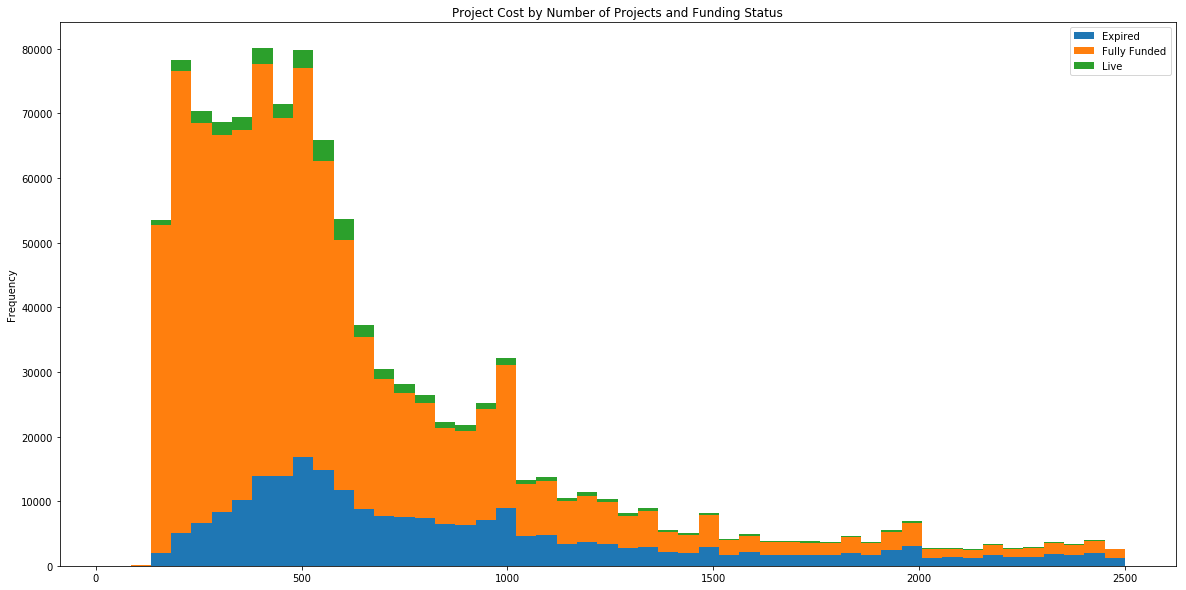

In [12]:
#projects[projects['Project Cost'] <= 2500].groupby(['Project Current Status'])['Project Cost'].plot.hist(
#    stacked=True, 
#    alpha = .5,
#    bins=50, 
#    figsize=(20,10))
projects['Project Current Status'].value_counts()
p_range = projects[projects['Project Cost'] <= 2500] #limited dataset to have more balanced histogram
p_fun = p_range[p_range['Project Current Status'] == "Fully Funded"]['Project Cost']
p_exp = p_range[p_range['Project Current Status'] == "Expired"]['Project Cost']
p_liv = p_range[p_range['Project Current Status'] == "Live"]['Project Cost']

p = pd.DataFrame({"Live": p_liv, "Fully Funded": p_fun, "Expired": p_exp})
p.plot.hist(
    stacked=True, 
    bins=50, 
    figsize=(20,10),
    title="Project Cost by Number of Projects and Funding Status")


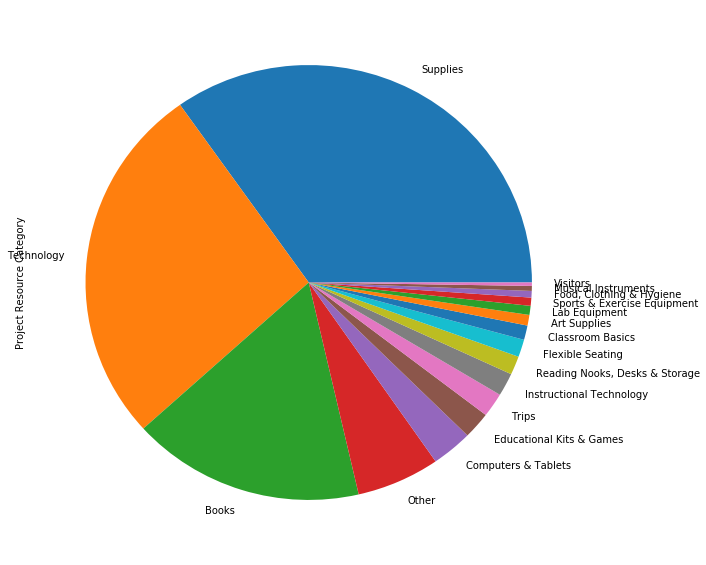

In [13]:
projects['Project Resource Category'].value_counts().plot.pie(figsize=(10,10))

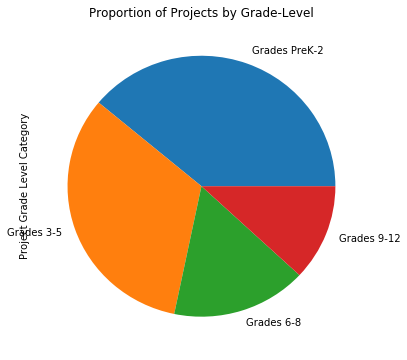

In [14]:
projects[projects['Project Grade Level Category'] != "unknown"]['Project Grade Level Category'].value_counts().plot.pie(
    figsize=(6,6),
    title="Proportion of Projects by Grade-Level")

## Resources

In [15]:
resources.head()

,Project ID,Resource Item Name,Resource Quantity,Resource Unit Price,Resource Vendor Name
0,000009891526c0ade7180f8423792063,chair move and store cart,1.0,350.00,NaN
1,00000ce845c00cbf0686c992fc369df4,sony mdr zx100 blk headphones,40.0,12.86,CDW-G
2,00002d44003ed46b066607c5455a999a,"gaiam kids stay-n-play balance ball, grey",4.0,19.00,Amazon Business
3,00002d44003ed46b066607c5455a999a,cf520x - giant comfy pillows - set of 4,1.0,269.00,Lakeshore Learning Materials
4,00002d44003ed46b066607c5455a999a,"serta lounger, mini, sky blue",1.0,131.85,Amazon Business


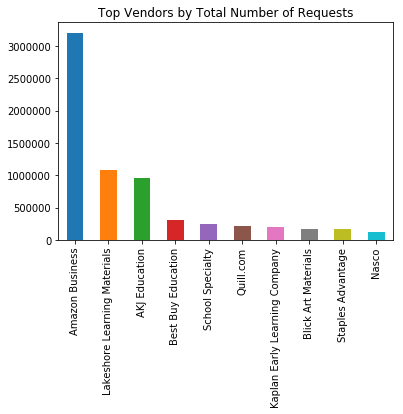

In [16]:
resources['Resource Vendor Name'].value_counts().head(10).plot.bar(title="Top Vendors by Total Number of Requests")

## Schools

In [17]:
schools.head()

,School ID,School Name,School Metro Type,School Percentage Free Lunch,School State,School Zip,School City,School County,School District
0,00003e0fdd601b8ea0a6eb44057b9c5e,Capon Bridge Middle School,rural,56.0,West Virginia,26711,Capon Bridge,Hampshire,Hampshire Co School District
1,00004e32a448b4832e1b993500bf0731,The Woodlands College Park High School,urban,41.0,Texas,77384,The Woodlands,Montgomery,Conroe Ind School District
2,0002021bb799f28de224f1acc1ff08c4,Samantha Smith Elementary School,suburban,2.0,Washington,98074,Sammamish,King,Lake Washington Sch Dist 414
3,0004604f675212a8cac1161338265196,Kingsbury Country Day School,unknown,76.0,Michigan,48370,Oxford,Oakland,Michigan Dept Of Education
4,0004c9d50bcf0cea990f844e58b5e2c3,Redwater Elementary School,rural,50.0,Texas,75573,Redwater,Bowie,Redwater Ind Sch District


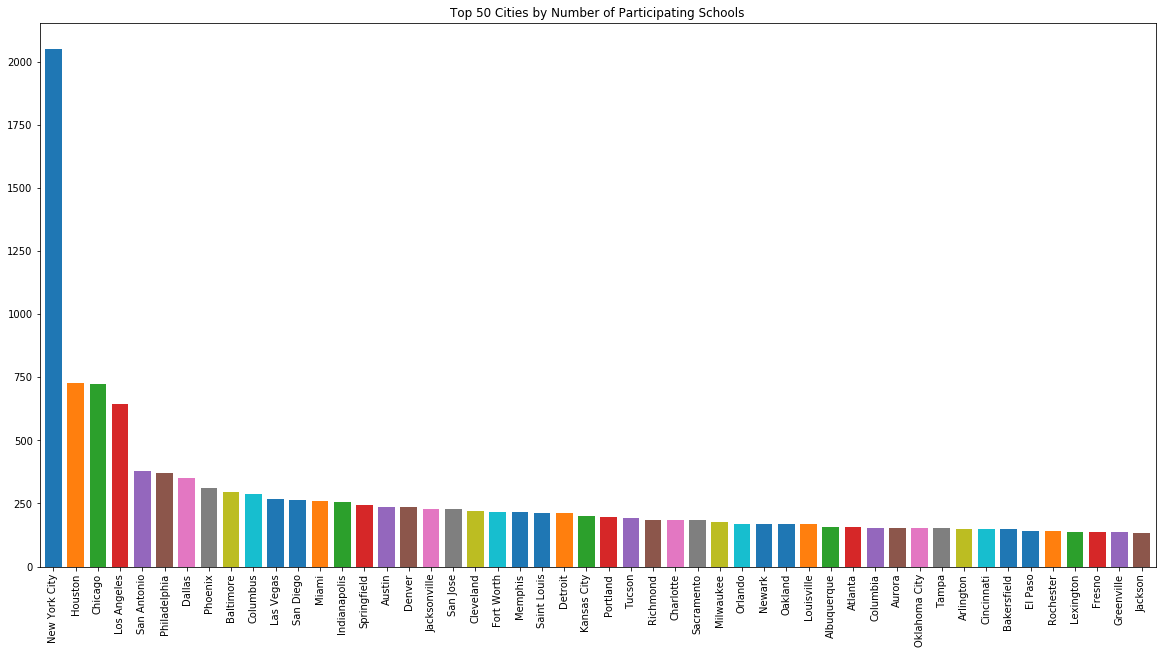

In [18]:
schools['School City'].value_counts().head(50).plot.bar(
    width=.75,
    figsize=(20,10),
    title='Top 50 Cities by Number of Participating Schools')

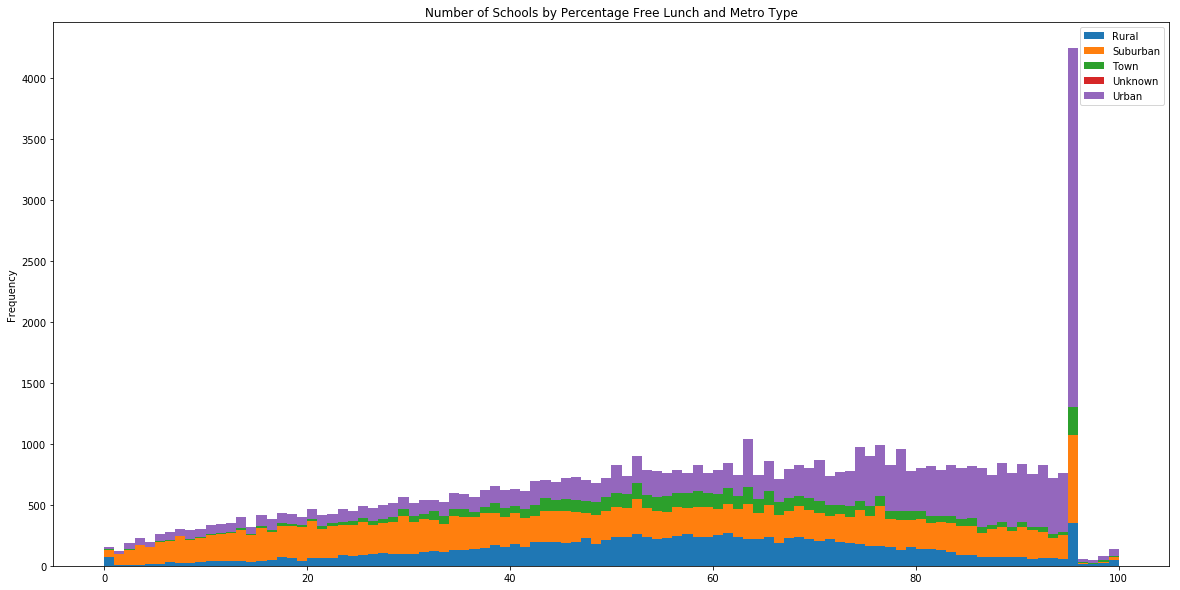

In [19]:
s_rur = schools[schools['School Metro Type'] == "rural"]['School Percentage Free Lunch']
s_sub = schools[schools['School Metro Type'] == "suburban"]['School Percentage Free Lunch']
s_tow = schools[schools['School Metro Type'] == "town"]['School Percentage Free Lunch']
s_unk = schools[schools['School Metro Type'] == "unkown"]['School Percentage Free Lunch']
s_urb = schools[schools['School Metro Type'] == "urban"]['School Percentage Free Lunch']
s = pd.DataFrame({"Rural": s_rur, "Suburban": s_sub, "Town": s_tow, "Unknown": s_unk, "Urban": s_urb})
s.plot.hist(
    stacked=True, 
    bins=100, 
    figsize=(20,10),
    title='Number of Schools by Percentage Free Lunch and Metro Type')

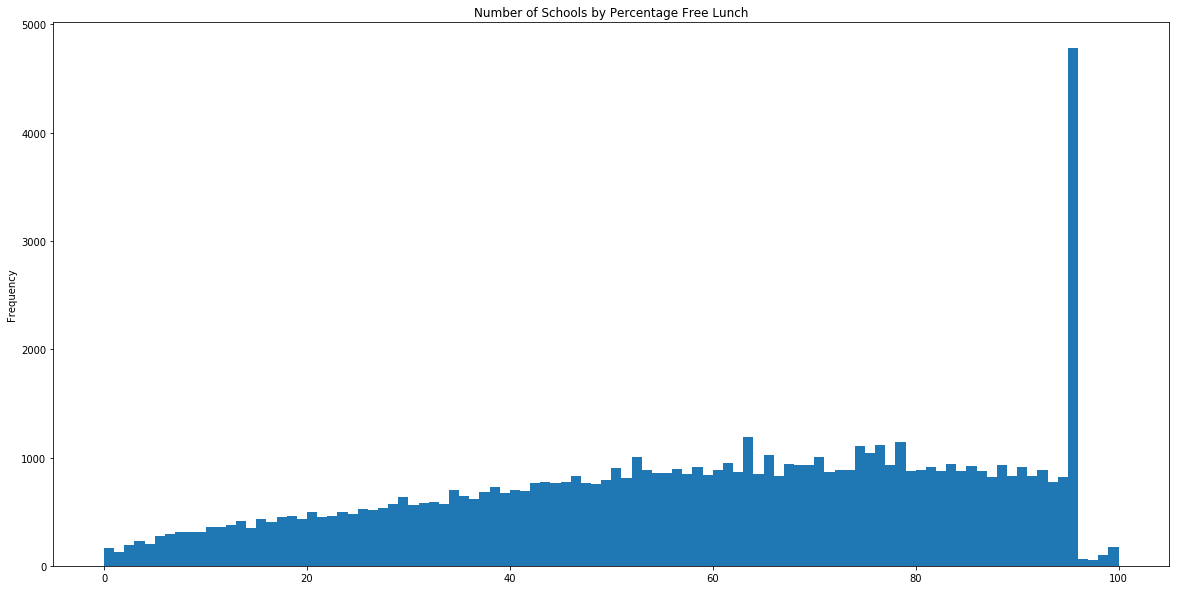

In [20]:
schools['School Percentage Free Lunch'].plot.hist(stacked=True, bins=100, figsize=(20,10), title="Number of Schools by Percentage Free Lunch")

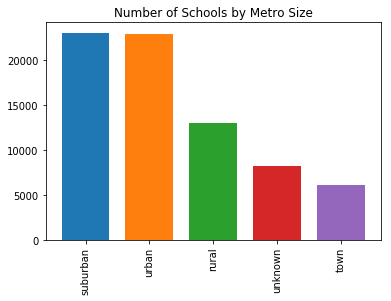

In [21]:
schools['School Metro Type'].value_counts().plot.bar(
    width=.75,
    title="Number of Schools by Metro Size")

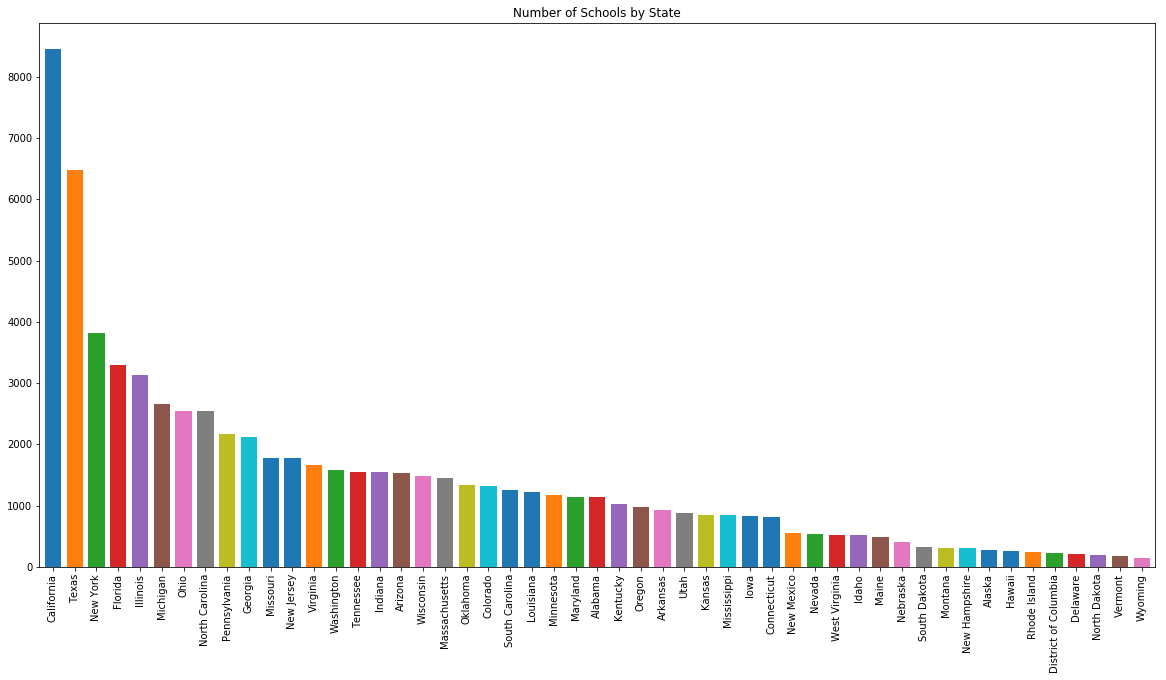

In [22]:
schools['School State'].value_counts().plot.bar(
    width=.75,
    figsize=(20,10), 
    title="Number of Schools by State")

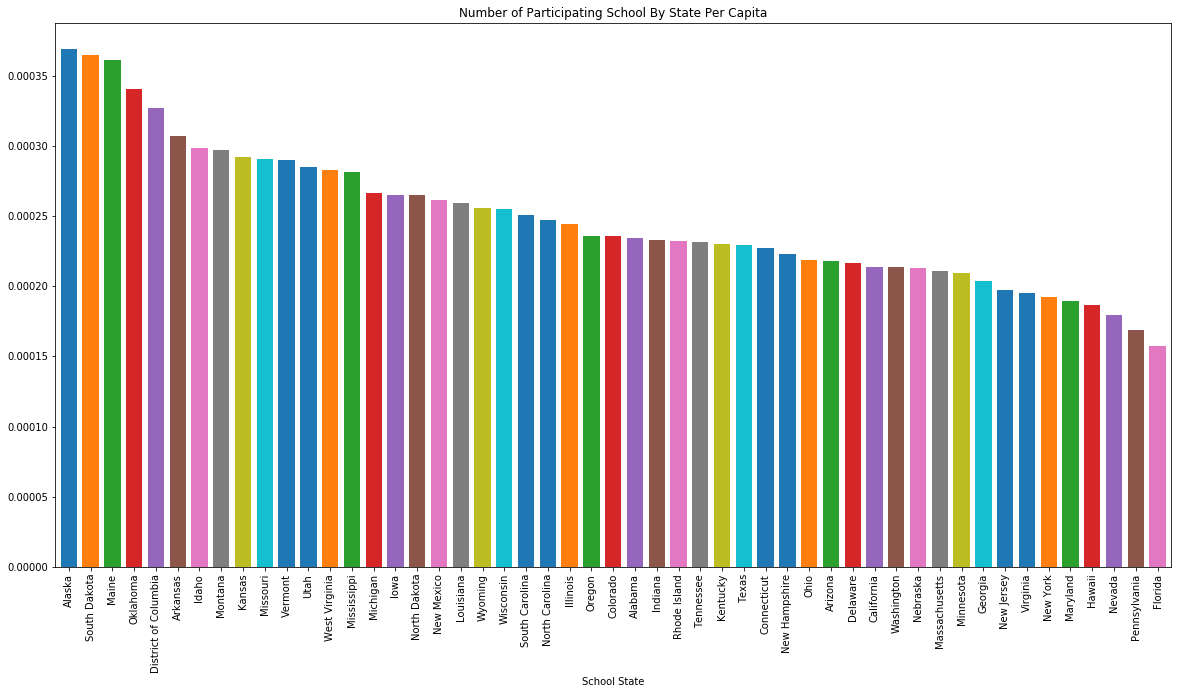

In [172]:
spc = schools.groupby(['School State'])['School State'].count()
schools_per_capita = pd.concat([spc, sp], axis=1, sort=True)
schools_per_capita['spc'] = schools_per_capita['School State'] / schools_per_capita[2017]
schools_per_capita['spc'].sort_values(ascending=False).plot.bar(
    width=.75,
    figsize=(20, 10),
    title='Number of Participating School By State Per Capita')

## Teachers

In [23]:
teachers.head()

,Teacher ID,Teacher Prefix,Teacher First Project Posted Date
0,00000f7264c27ba6fea0c837ed6aa0aa,Mrs.,2013-08-21
1,00002d44003ed46b066607c5455a999a,Mrs.,2016-10-23
2,00006084c3d92d904a22e0a70f5c119a,Mr.,2016-09-08
3,0000a9af8b6b9cc9e41f53322a8b8cf1,Ms.,2015-10-25
4,0000d4777d14b33a1406dd6c9019fe89,Ms.,2017-02-10


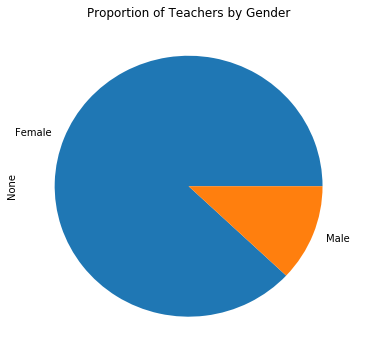

In [24]:
numMale = teachers[teachers['Teacher Prefix'] == "Mr."]['Teacher ID'].count()
numFemale = teachers[teachers['Teacher Prefix'].isin(['Ms.', 'Mrs.'])]['Teacher ID'].count()
genderSrs = pd.Series([numFemale, numMale], index=['Female', 'Male'])
genderSrs.plot.pie(figsize=(6,6), title="Proportion of Teachers by Gender")

## Findings

In [25]:
plt.show()